<a href="https://colab.research.google.com/github/jojoroy/Learning/blob/main/Regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

Text(0.5, 0, 'y')

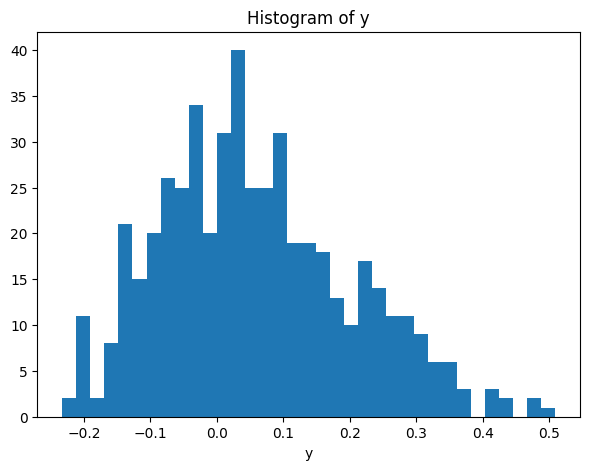

In [ ]:
q2data=pd.read_csv('drive/MyDrive/01857917.csv')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.hist(q2data['y'],bins=35)
plt.title('Histogram of y')
plt.xlabel('y')

<ipython-input-12-c5b571aea1cf>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)
<ipython-input-12-c5b571aea1cf>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)
<ipython-input-12-c5b571aea1cf>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)
<ipython-input-12-c5b571aea1cf>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)
<ipython-input-12-c5b571aea1cf>:12: UserWarning: set_ticklabels() sh

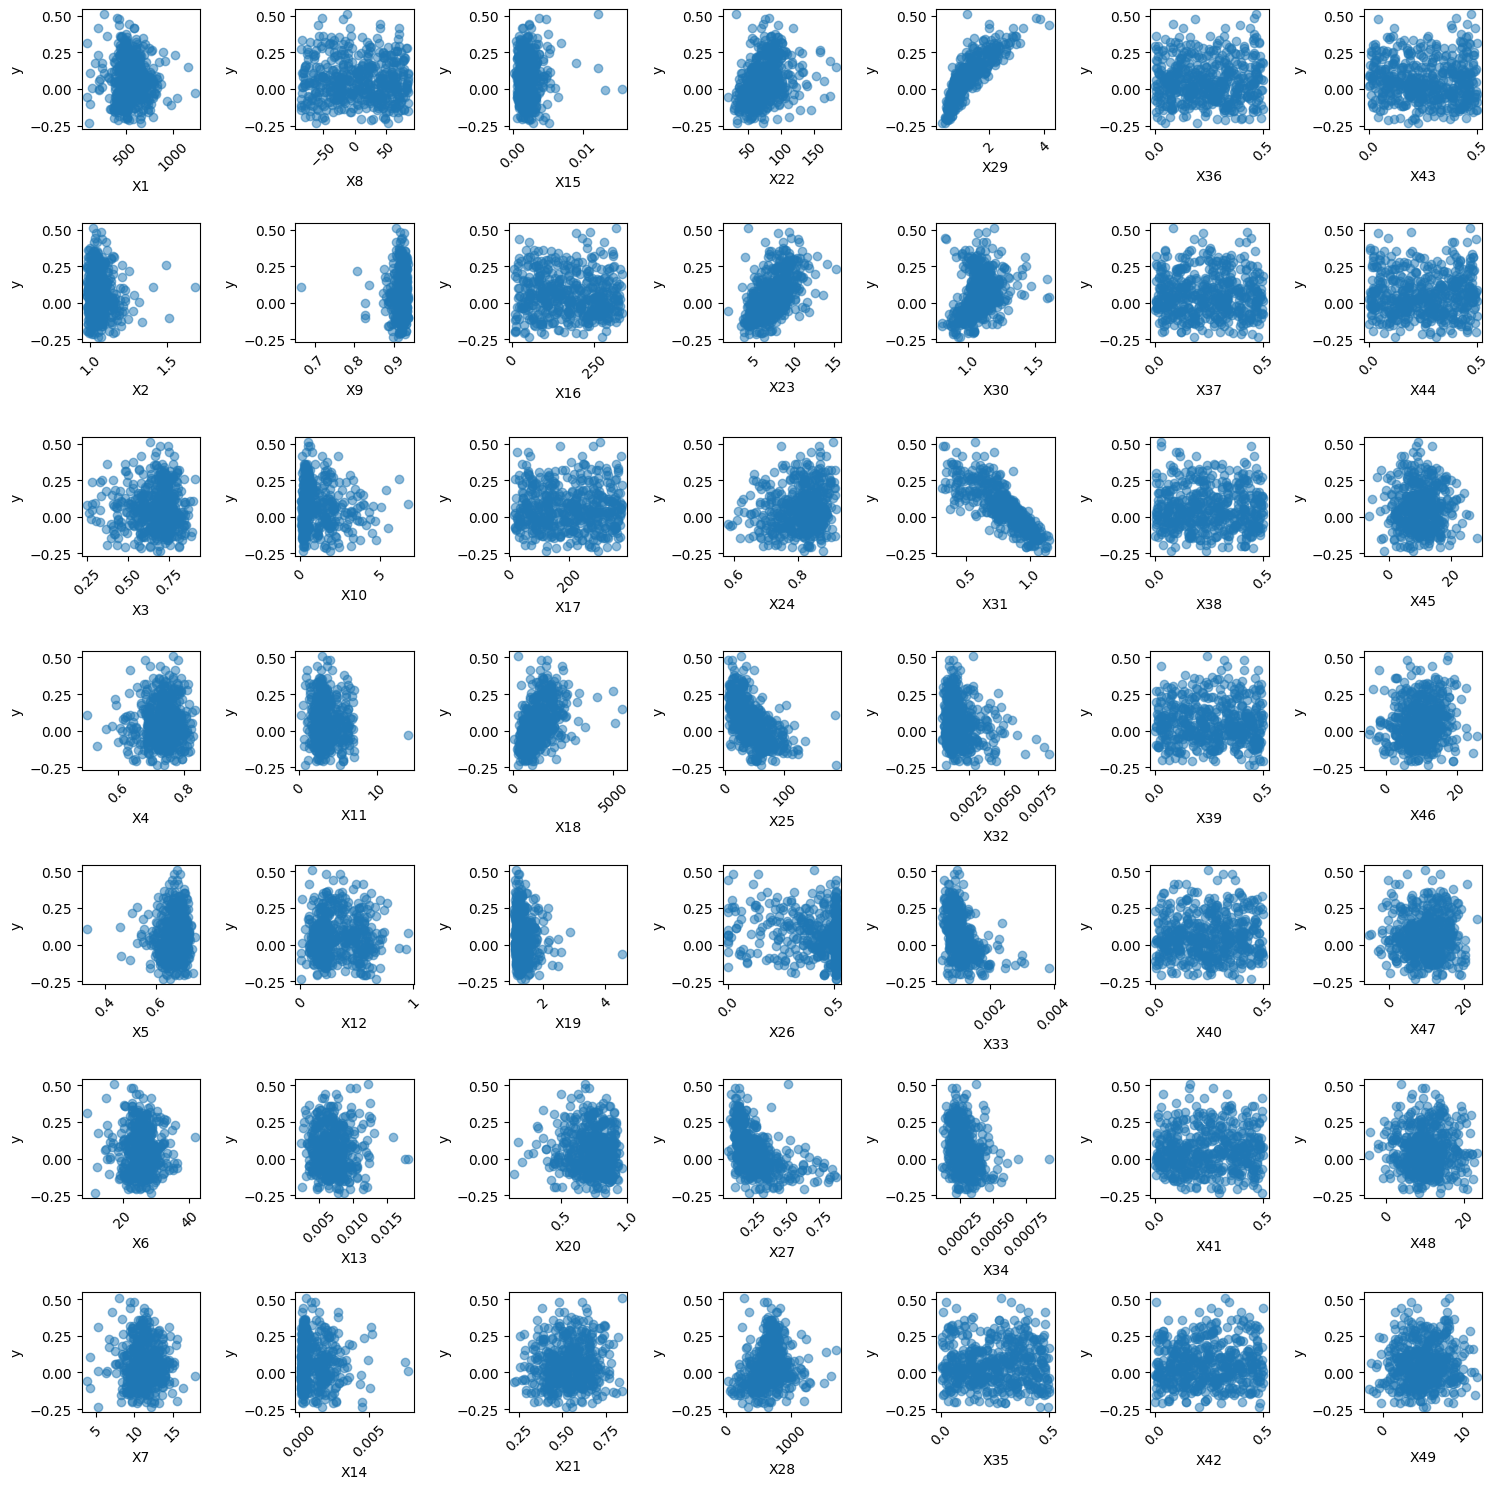

In [ ]:
covariates = q2data.columns.drop('y')
# Create a 7 by 7 grid of plots
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(15, 15))
## Iterate through each covariate
for i in range(7):
  for j in range(7):
    if j*7 + i < len(covariates):
      axes[i, j].scatter(q2data[covariates[j*7 + i]], q2data['y'],
      alpha=0.5)
      axes[i, j].set_xlabel(covariates[j*7 + i])
      axes[i, j].set_ylabel('y')
      axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)
# Hide unused subplots
for i in range(7):
  for j in range(7):
    if j*7 + i >= len(covariates):
      axes[i, j].axis('off')
      fig.suptitle("Y against Covariates")
plt.tight_layout()
plt.show()


In [ ]:
correlation_matrix=q2data.corr()

In [ ]:
threshold = 0.8
high_corr_pairs = correlation_matrix.unstack()  # Unstack to get pairwise correlations
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > threshold]  # Filter by threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlations (correlation = 1)
high_corr_pairs = high_corr_pairs.drop_duplicates()  # Remove duplicate pairs

# Display high-correlation pairs
print(high_corr_pairs)

y    X29    0.856797
     X31   -0.813727
X1   X6     0.858751
     X7     0.886058
X10  X14    0.814592
     X32    0.805024
X13  X15    0.848484
X18  X22    0.852751
     X23    0.887898
X21  X24    0.886045
X29  X31   -0.873268
dtype: float64


In [3]:
from sklearn.model_selection import train_test_split
# split data into test and train
q2data=pd.read_csv('drive/MyDrive/01857917.csv')
q2data=q2data.to_numpy()
X = q2data[:, 1:]
y = q2data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
random_state=1)


In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# tune for forest depth and max features
# range of values considered for the number of features to consider at split
depths=[None,5,10,15,20,25,30,40,50,60,70]
max_features=list(range(1, 49, 5))
# initialize the matrix of out-of-bag scores
oob_scores = np.zeros((len(depths), len(max_features)))
print('Training models...')
for i, depth in enumerate(depths):
  for j, max_feature in enumerate(max_features):
    model = ensemble.RandomForestRegressor(oob_score=True, max_features=
    max_feature, max_depth=depth, n_estimators=100, random_state=1857917)
    model.fit(X_train, y_train)
    oob_scores[i, j] = mean_squared_error(model.oob_prediction_, y_train)
print('Finished!')
idx_mtry, idx_maxnode = np.unravel_index(np.argmin(oob_scores), oob_scores.shape)

Training models...
Finished!


In [ ]:
depth = depths[idx_mtry]
maxf = max_features[idx_maxnode]
#nest = n_estimators[idxest]
print(f'Best mtry: {depth}')
print(f'Best maxnode: {maxf}')

Best mtry: 15
Best maxnode: 36


In [ ]:
nest_oob=np.zeros(8)
for i in range(1,201,25):
    print(int((i-1)/25)/8*100)
    model = ensemble.RandomForestRegressor(oob_score=True, max_features=36, max_depth=15, n_estimators=i, random_state=1857917)
    model.fit(X_train, y_train)
    nest_oob[int((i-1)/25)] = mean_squared_error(model.oob_prediction_, y_train)

0.0
12.5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25.0
37.5
50.0
62.5
75.0
87.5


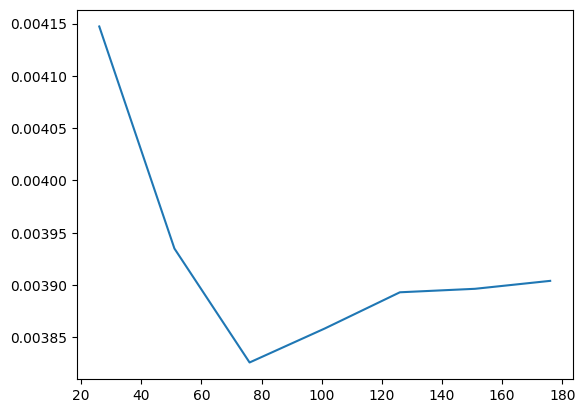

In [ ]:
plt.plot(range(1,201,25)[1:],nest_oob[1:])

In [ ]:
SEED=1857917
def train_pred_mse(model, train_X, train_y, test_X, test_y):
  model.fit(train_X, train_y)
  pred_y = model.predict(test_X)
#return mean_squared_error(pred_y, test_y)
  return mean_squared_error(model.oob_prediction_, y_train)
default_model = ensemble.RandomForestRegressor(random_state=SEED,oob_score=True)
default_mse = train_pred_mse(default_model, X_train, y_train, X_test, y_test)
tuned_model = ensemble.RandomForestRegressor(oob_score=True,max_features=36,
max_depth=15, n_estimators=63, random_state=SEED)
tuned_mse = train_pred_mse(tuned_model, X_train, y_train, X_test, y_test)
print(f'Tuned model MSE: {round(tuned_mse, 9)}')
print(f'Default model MSE: {round(default_mse, 9)}')
rfr_pred_y=tuned_model.predict(X_test)
rfr_mse=mean_squared_error(rfr_pred_y,y_test)
rfr_mse



Tuned model MSE: 0.003840114
Default model MSE: 0.00400595


0.0037701833545251058

In [ ]:
## Linear regression with penalty ridge
## cross validation on training set to find lambda

def get_ridge_LOOCV(
    X: np.ndarray, y: np.ndarray, lmbda: float
) -> np.ndarray:

    CV = np.zeros((X.shape[0], 1))

    for i in range(X.shape[0]):
        X_train, X_test, y_train, y_test = (
            np.delete(X, i, axis=0),
            X[i,:],
            np.delete(y, i, axis=0),
            y[i],
        )
        # solve for coefs such that X^T @ X @ coefs + lmbda diag(X.shape[1]) = X.T @ y
        coefs = np.linalg.solve(
            X_train.T @ X_train + lmbda * np.eye(X_train.shape[1]), X_train.T @ y_train
        )
        pred_y = X_test @ coefs
        mse_test = np.mean((pred_y - y_test) ** 2)
        CV[i] = mse_test
    cv_mean = np.mean(CV)
    cv_sd = np.std(CV)

    return cv_mean, cv_sd

## use on whole training set check mse on test set

Text(0.5, 0, '$\\lambda$')

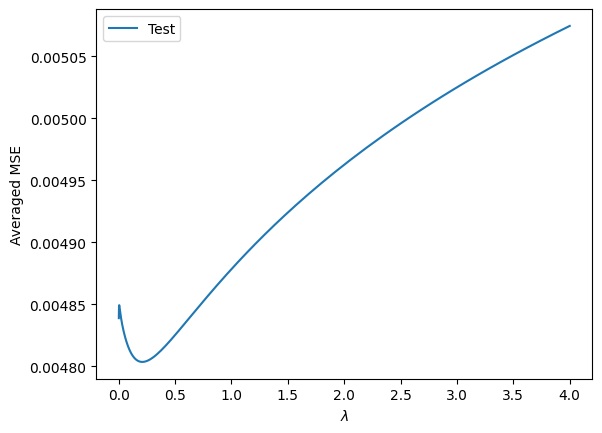

In [ ]:
lmbdas = 2 ** np.linspace(-10, 2, 251)
ridge_mses = [get_ridge_LOOCV(X_train, y_train, lmbda)[0] for lmbda in lmbdas]
plt.plot(lmbdas, ridge_mses, label="Test")
plt.legend()
plt.ylabel("Averaged MSE")
plt.xlabel("$\lambda$")

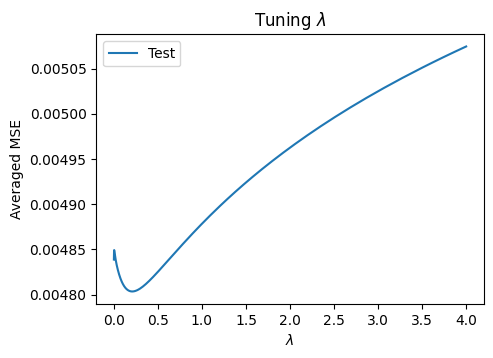

In [ ]:
plt.figure(figsize=(5,3.5))
plt.plot(lmbdas, ridge_mses, label="Test")
plt.legend()
plt.ylabel("Averaged MSE")
plt.xlabel("$\lambda$")
plt.title('Tuning $\lambda$')
plt.show()

In [ ]:
# get the value of Lambda minimizing the LOOCV MSE
lmbda = lmbdas[np.argmin(ridge_mses)]
print("Lambda minimising LOOCV MSE=", lmbda)


Lambda minimising LOOCV MSE= 0.20704266533363638


In [ ]:
lmbda=0.21168632809063176
coefs1 = np.linalg.solve(
    X_train.T @ X_train + lmbda * np.eye(X_train.shape[1]), X_train.T @ y_train
)
pred_ridge = X_test @ coefs1
mse_ridge = np.mean((pred_ridge - y_test) ** 2)
print(coefs1 )
print(f"MSE_ridge: {mse_ridge}")

[ 3.97412560e-04  1.51509880e-01  7.67736568e-02  1.33306450e-02
 -1.06276792e-01 -6.42521799e-03  8.38437137e-03  6.82163208e-05
  1.12476889e-01 -3.21368612e-03 -1.82319532e-02  1.40844799e-02
  8.56196478e-03  5.19362235e-04  1.74542970e-02  2.77471330e-05
 -9.10016048e-05  2.15036005e-05 -2.34609838e-02 -5.10793859e-02
  8.11580825e-02 -2.81114299e-04 -4.04175867e-02  1.38206616e-01
  3.12616417e-05  3.97543754e-02 -9.88890119e-02  6.42647216e-05
  1.33129511e-01 -3.00570791e-02 -3.45965626e-01 -6.39490682e-03
  6.39797241e-04  1.28490885e-03 -1.94208803e-02  1.45142349e-02
 -1.55342139e-03 -7.01706288e-03  4.71229394e-03  5.24408476e-03
 -9.19381655e-03  2.40937533e-02  1.70637366e-02  9.64938462e-03
 -1.73016460e-04  4.11569742e-04 -1.02161492e-03  4.92998771e-04
  6.12691929e-04]
MSE_ridge: 0.003742819077842005


y    X29    0.856797
     X31   -0.813727
X1   X6     0.858751
     X7     0.886058
X10  X14    0.814592
     X32    0.805024
X13  X15    0.848484
X18  X22    0.852751
     X23    0.887898
X21  X24    0.886045
X29  X31   -0.873268

In [2]:
q2data=pd.read_csv('drive/MyDrive/01857917.csv')

In [ ]:
q2data1=q2data.drop(columns=['X31',])

In [1]:
pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 7.5 MB/s eta 0:00:00


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabpfn import TabPFNRegressor

In [6]:


# Load data
#X, y = load_diabetes(return_X_y=True)

# Initialize a regressor
reg = TabPFNRegressor(random_state=1857917)
reg.fit(X_train, y_train)

# Predict a point estimate (using the mean)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

# Predict quantiles
quantiles = [0.25, 0.5, 0.75]
quantile_predictions = reg.predict(
    X_test,
    output_type="quantiles",
    quantiles=quantiles,
)
for q, q_pred in zip(quantiles, quantile_predictions):
    print(f"Quantile {q} MAE:", mean_absolute_error(y_test, q_pred))

# Predict with mode
mode_predictions = reg.predict(X_test, output_type="mode")
print("Mode MAE:", mean_absolute_error(y_test, mode_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr

Mean Squared Error (MSE): 0.001972096985882617
Mean Absolute Error (MAE): 0.036468402895857614
R-squared (R^2): 0.8807825022895666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Quantile 0.25 MAE: 0.03942356648045239
Quantile 0.5 MAE: 0.0358820952171782
Quantile 0.75 MAE: 0.042705707451448145


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mode MAE: 0.03589107244614242


In [7]:
predictions

array([ 0.10814795, -0.02025868, -0.10759765, -0.10015137, -0.1191943 ,
        0.18756546,  0.25617942,  0.04680559,  0.27912742,  0.32350343,
       -0.00854529,  0.15211679,  0.08333426, -0.1452085 , -0.15759909,
        0.25215244,  0.03584429,  0.31550348,  0.0448893 , -0.05853952,
       -0.01684011,  0.2628264 ,  0.17460638,  0.07498003, -0.02761606,
        0.02157868, -0.15424684,  0.08891299,  0.1503965 ,  0.08730967,
        0.02533608,  0.33192724,  0.08013324,  0.00674376,  0.26218134,
        0.1308155 , -0.08116159,  0.1855011 ,  0.16029139, -0.08405159,
        0.19350767,  0.13592665,  0.14524199,  0.11840921, -0.07411418,
        0.2512185 ,  0.09523587,  0.01146439, -0.00575167,  0.18242323,
        0.15869613,  0.01981163, -0.16605987, -0.0592324 ,  0.24431914,
       -0.02087821,  0.1911306 ,  0.20560196, -0.00325984,  0.29245046,
       -0.05406031, -0.08523781,  0.02566113,  0.12977712,  0.06095196,
       -0.10529452,  0.02120196,  0.16996074, -0.02496922, -0.14

In [8]:
np.savetxt('drive/MyDrive/tabfpnpreds.csv',predictions,delimiter=',')